In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(plotrix))
suppressPackageStartupMessages(library(ggsci))

Warning message:
“package ‘plotrix’ was built under R version 4.0.5”
Warning message:
“package ‘ggsci’ was built under R version 4.0.5”


In [2]:
## path variables
results_dir <- '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/NicheNet_outputs/ligand_activities_FC_CC/'
fig_dir <- '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/NicheNet/'

In [3]:
## read data
mat <- read.csv(paste0(results_dir,'220207_qual_crosstalk_FC_CC.csv'), row.names = 1, check.names = F, header = T)
mat <- as.matrix(mat)

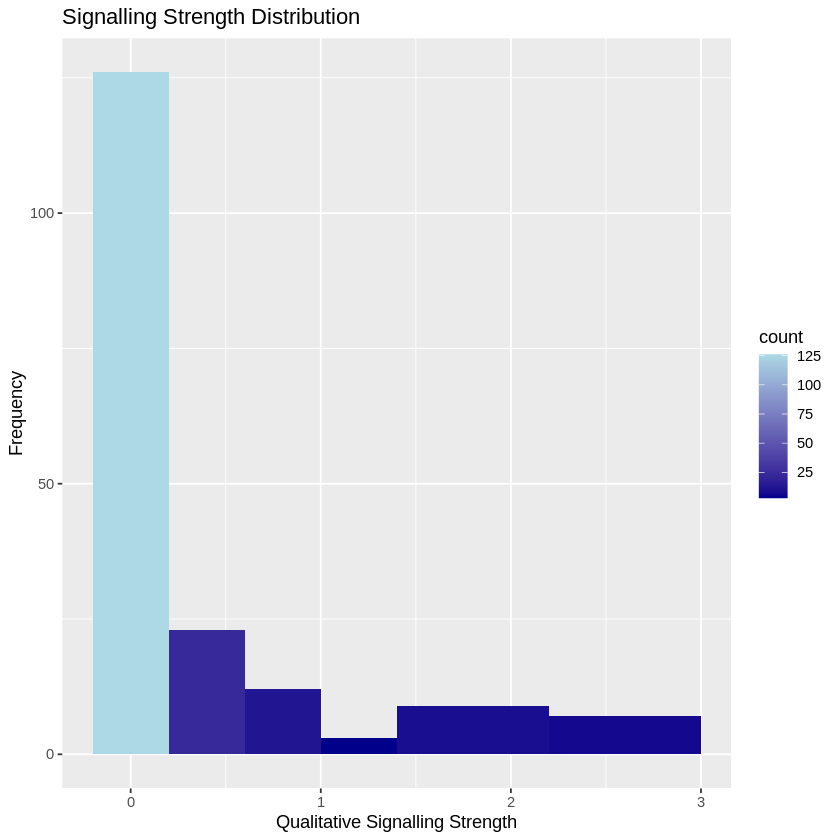

In [4]:
## visualize distribution of scores
qplot(x = mat , fill=..count.., geom='histogram', binwidth = .4,
                 xlab = 'Qualitative Signalling Strength',
                 ylab = 'Frequency',
                 main = 'Signalling Strength Distribution')+ scale_fill_gradient(low='darkblue', high='lightblue')

Warning message:
“Removed 95 rows containing non-finite values (stat_bin).”


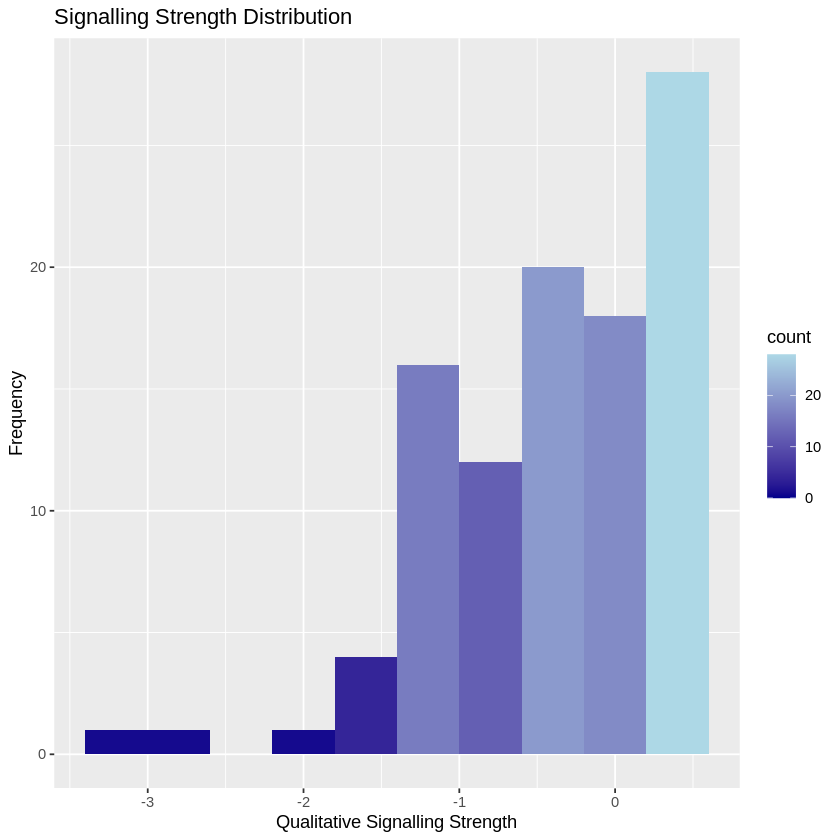

In [5]:
## visualize distribution of scores
qplot(x = log10(mat) , fill=..count.., geom='histogram', binwidth = .4,
                 xlab = 'Qualitative Signalling Strength',
                 ylab = 'Frequency',
                 main = 'Signalling Strength Distribution')+ scale_fill_gradient(low='darkblue', high='lightblue')

In [6]:
## do not consider autocrine feedback
diag(mat) = 0

In [7]:
## highlight differences for visualization
mat[mat < 0.5] = 0
mat = mat * 1

In [8]:
#reorder cols and rows to make plot visually more appealing
mat <- mat[c('Airway Epithelium','Alveolar Epithelium','capillary EC', 'vascular EC','lymphatic EC','Fibroblasts','SMC/Pericytes',
             'Macrophages','DC','Mast cells',
             'B cells','Plasma cells','T cells','NK cells'),
           c('Airway Epithelium','Alveolar Epithelium','capillary EC','vascular EC','lymphatic EC','Fibroblasts','SMC/Pericytes',
             'Macrophages','DC','Mast cells',
             'B cells','Plasma cells','T cells','NK cells')]

In [9]:
## parameters for plotting 
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 100)

In [10]:
## create igraph object
nn_ig <- graph_from_adjacency_matrix(mat,  mode = c('directed'), weighted = TRUE)

In [11]:
### size factor for vertex size
sf <- 1

In [12]:
## multiply weights with weight factor - for visualization purposes only
wf <- 2
#E(nn_ig)$weight <- E(nn_ig)$weight*wf

In [13]:
nn_ig

IGRAPH c6815cd DNW- 14 47 -- 
+ attr: name (v/c), weight (e/n)
+ edges from c6815cd (vertex names):
 [1] Airway Epithelium  ->Alveolar Epithelium
 [2] Airway Epithelium  ->vascular EC        
 [3] Airway Epithelium  ->lymphatic EC       
 [4] Airway Epithelium  ->Fibroblasts        
 [5] Airway Epithelium  ->SMC/Pericytes      
 [6] Airway Epithelium  ->Macrophages        
 [7] Alveolar Epithelium->vascular EC        
 [8] Alveolar Epithelium->lymphatic EC       
+ ... omitted several edges

In [14]:
## have a look at node names
V(nn_ig)$name

[1] "Airway Epithelium"   "Alveolar Epithelium" "capillary EC"       
 [4] "vascular EC"         "lymphatic EC"        "Fibroblasts"        
 [7] "SMC/Pericytes"       "Macrophages"         "DC"                 
[10] "Mast cells"          "B cells"             "Plasma cells"       
[13] "T cells"             "NK cells"

In [15]:
## add colors to edges
E(nn_ig)$color <- color.scale(E(nn_ig)$weight, extremes = c(pal_material('pink')(10)[1], pal_material('pink')(10)[10]))

In [16]:
## add colors to edges
E(nn_ig)$color <- color.scale(E(nn_ig)$weight, extremes = c('#EAF2E3', '#90BE6D'))

In [17]:
## define circular layout
circle_coordinates <- layout_in_circle(nn_ig)

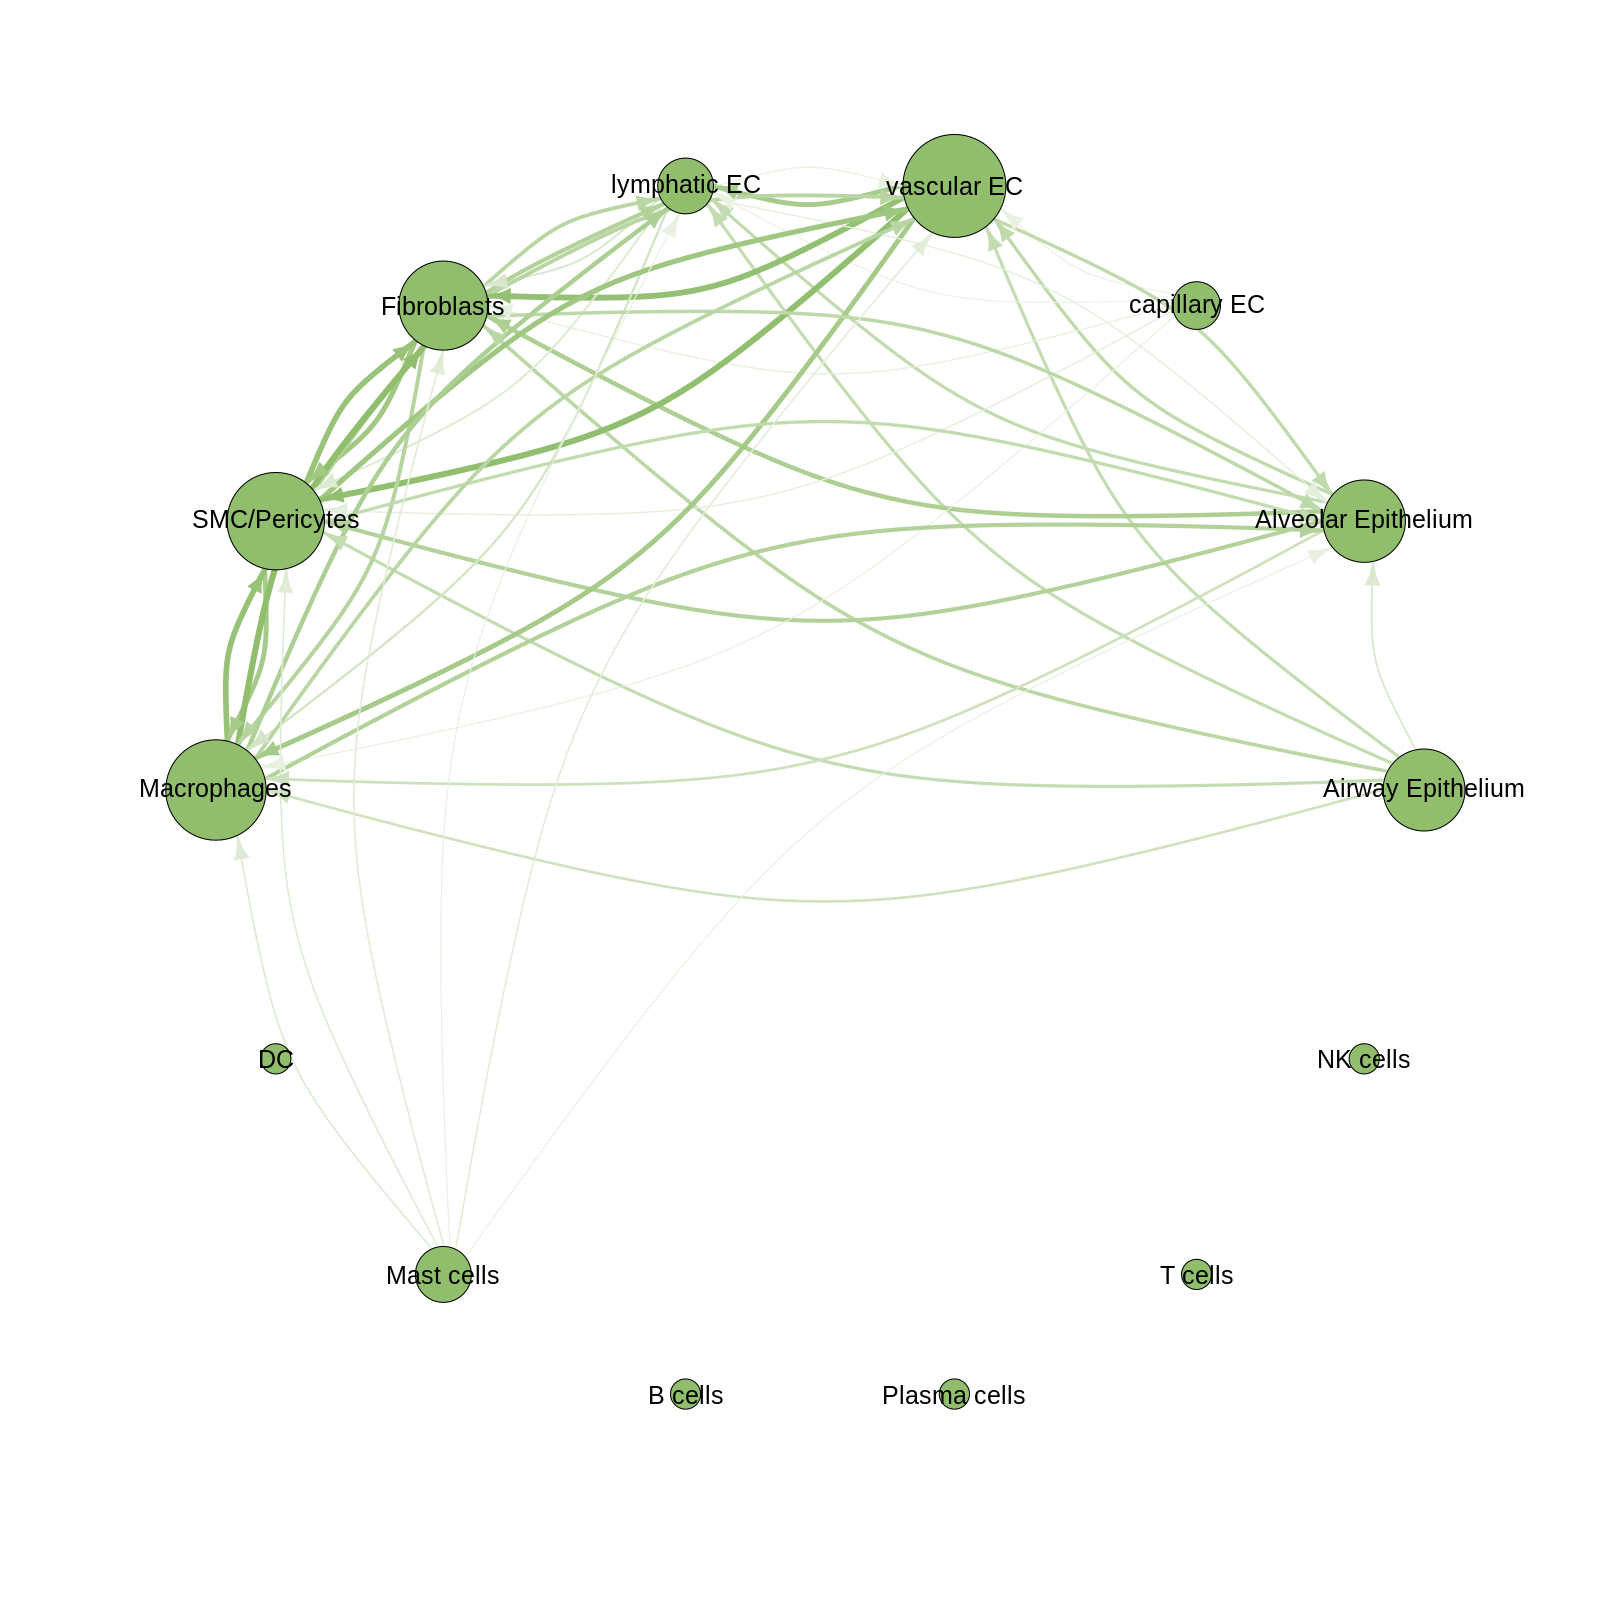

In [18]:
## plot graph
plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = E(nn_ig)$weight*wf,
     vertex.size = 5+sf*rowSums(mat), vertex.color = '#90BE6D', 
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 1.5,
     edge.curved = .3, edge.arrow.size = .4)

In [19]:
radian.rescale <- function(x, start=0, direction=1) {
    c.rotate <- function(x) (x + start) %% (2 * pi) * direction
    c.rotate(scales::rescale(x, c(0, 2 * pi), range(x)))
  }

In [20]:
label.locs <- radian.rescale(x=1:length(V(nn_ig)), direction=-1, start=0)

In [21]:
# save to pdf
pdf(paste0(fig_dir, 'crosstalk_exvivo_FC_overview.pdf'),         # File name
    width = 10, 
    height = 16, # Width and height in inches
    #colormodel = 'cymk',    # Color model (cmyk is required for most publications)
    paper = 'a4r')          # Paper size
# creating plot

plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = E(nn_ig)$weight,
     vertex.size = 2+sf*rowSums(mat), vertex.color = '#90BE6D', 
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 0.5, 
     vertex.label.dist= 3, vertex.label.degree=label.locs,
     edge.curved = .3, edge.arrow.size = .3)

# closing the graphical device
dev.off() 

png 
  2

### Coloured circle plot

In [22]:
ct_colors <- c('navy','magenta','#DC143C','orange','gold','darkgreen','#DC143C',
                    'blue','deepskyblue','darkmagenta','pink','red','#EEEF20','#AACC00'#,'turquoise'
)

In [23]:
## set vertex colors to colors from UMAP
V(nn_ig)$color <- ct_colors

In [24]:
## retrieve start and end of each edge
edge.start <- ends(nn_ig, es=E(nn_ig), names=F)[,1] 
## set color based on start if each edge
edge.col <- V(nn_ig)$color[edge.start]

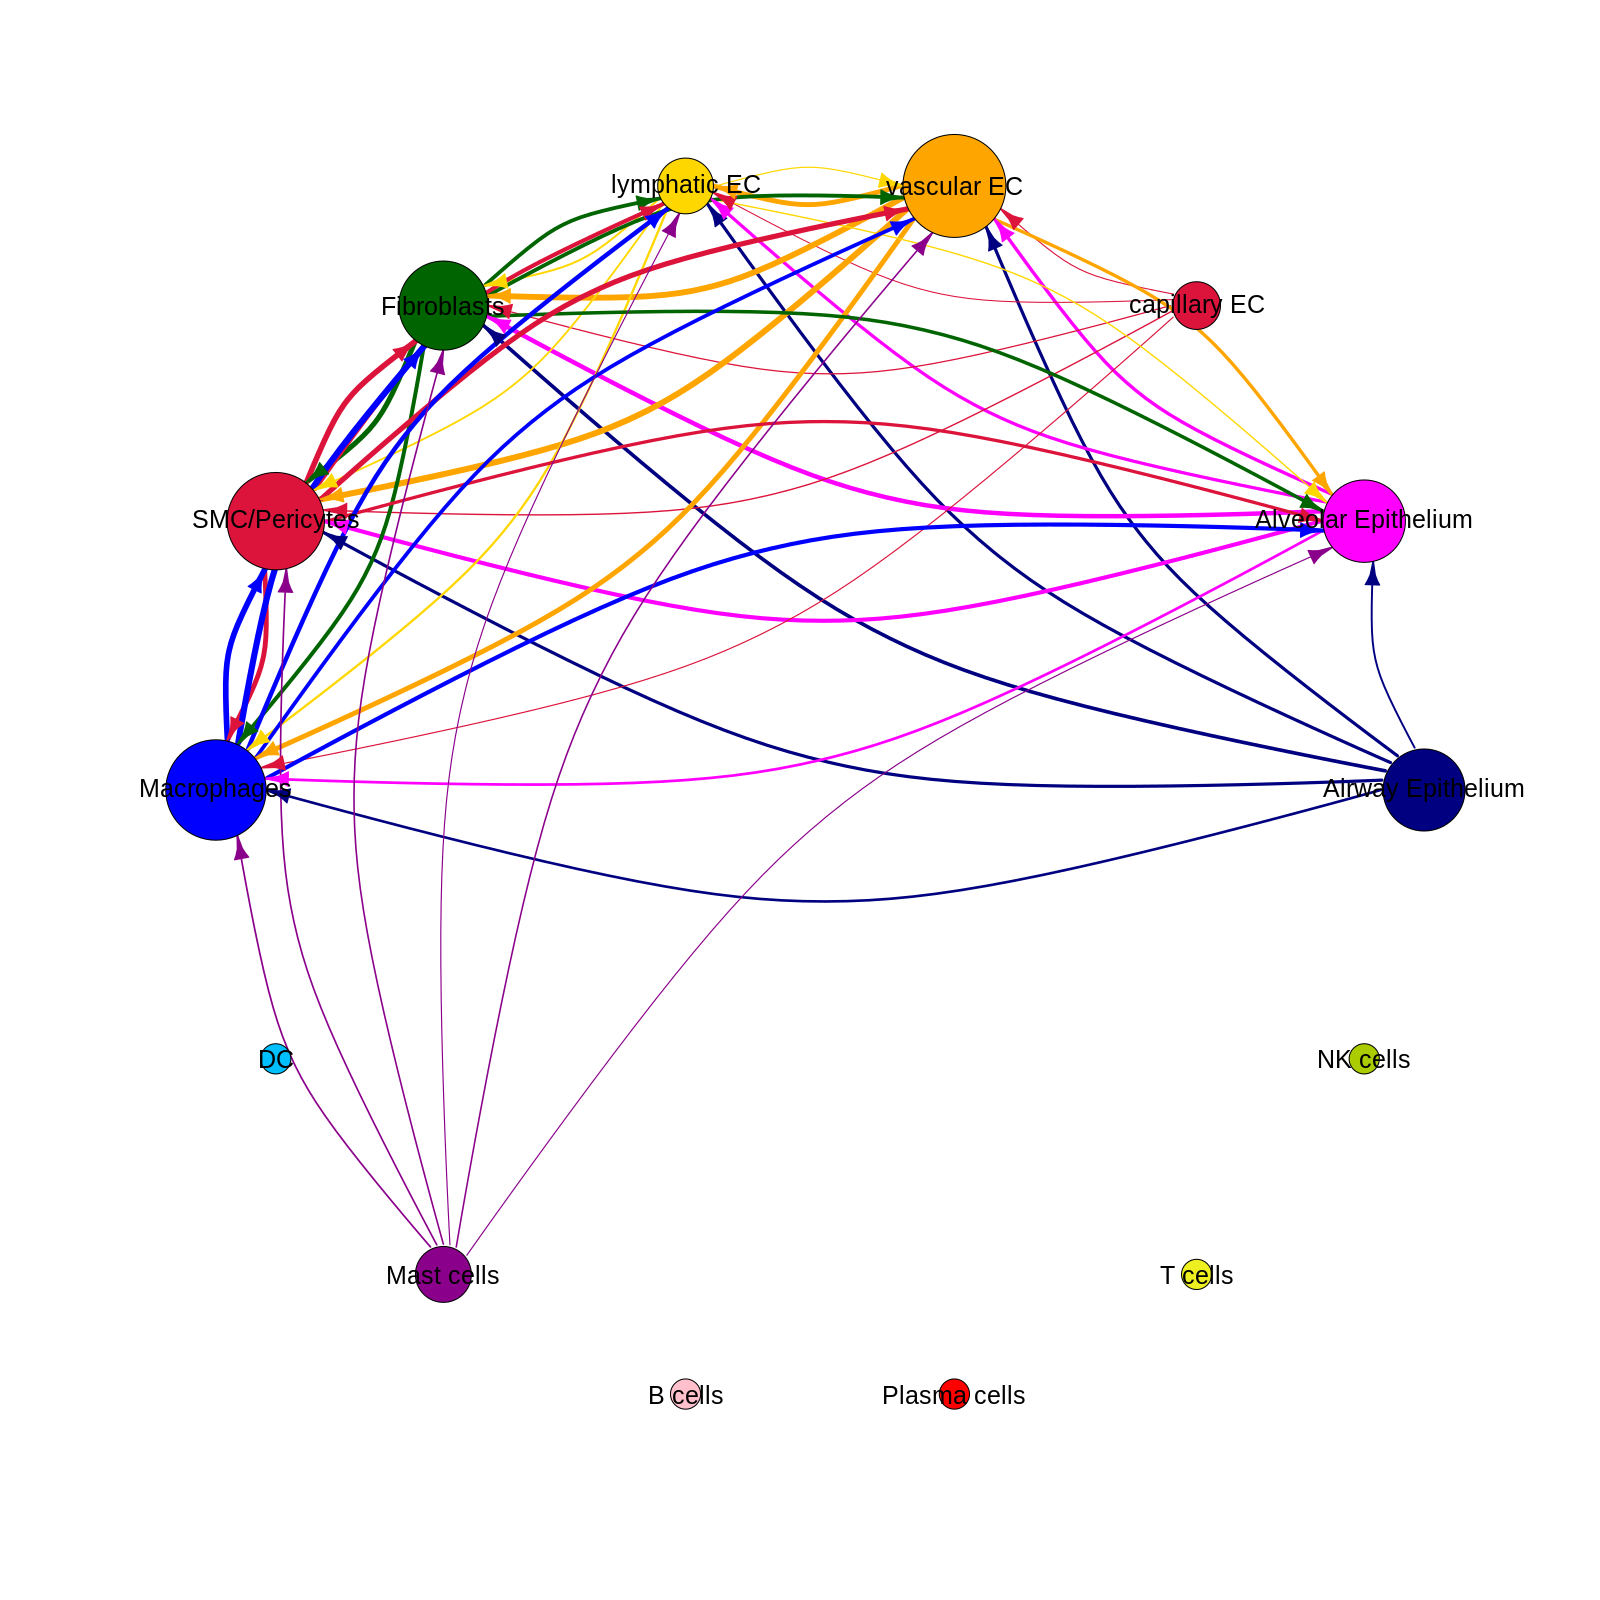

In [25]:
## plot graph
plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = E(nn_ig)$weight*wf, edge.color=edge.col,
     vertex.size = 5+sf*rowSums(mat), vertex.color = ct_colors, 
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 1.5,
     edge.curved = .3, edge.arrow.size = .4)

In [26]:
wf <- 0.5

In [27]:
# save to pdf
pdf(paste0(fig_dir, 'crosstalk_exvivo_FC_overview_coloured.pdf'),         # File name
    width = 4, 
    height = 4, # Width and height in inches
    #colormodel = 'cymk',    # Color model (cmyk is required for most publications)
    paper = 'a4')          # Paper size
# creating plot
plot(nn_ig, 
     layout = circle_coordinates,
     edge.width = E(nn_ig)$weight*wf, edge.color=edge.col,
     vertex.size = 2+sf*rowSums(mat), vertex.color = ct_colors,  
     vertex.label.family = 'Helvetica', vertex.label.color= 'black', vertex.label.cex = 0.5, 
     vertex.label.dist= 3, vertex.label.degree=label.locs,
     edge.curved = .3, edge.arrow.size = .3)
# closing the graphical device
dev.off() 

png 
  2